In [62]:
from fbprophet import Prophet
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("google-data.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df.Date = df.Date.apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
sample = df[["Date","Close"]]
sample.columns = ["ds", "y"]

In [ ]:
sample

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


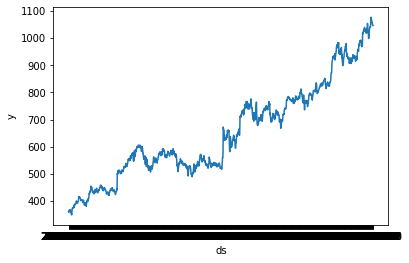

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x= sample.ds, y= sample.y)
plt.show()

In [ ]:
# separate data to train and test for further optimization
train = sample.iloc[:-100,]
test = sample.iloc[-100:]

In [ ]:
model = Prophet()

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.make_future_dataframe(periods = 100, freq= "D")
predictions = model.predict(forecast)

In [ ]:
forecast.shape

(1259, 1)

In [ ]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,386.997704,345.739081,399.745296,386.997704,386.997704,-14.746664,-14.746664,-14.746664,6.879679,6.879679,6.879679,-21.626343,-21.626343,-21.626343,0.0,0.0,0.0,372.251039
1,2013-01-03,387.169039,342.336395,397.181183,387.169039,387.169039,-16.293346,-16.293346,-16.293346,5.926867,5.926867,5.926867,-22.220213,-22.220213,-22.220213,0.0,0.0,0.0,370.875693
2,2013-01-04,387.340375,344.703678,399.317409,387.340375,387.340375,-16.544963,-16.544963,-16.544963,6.222136,6.222136,6.222136,-22.767100,-22.767100,-22.767100,0.0,0.0,0.0,370.795412
3,2013-01-07,387.854382,343.735476,397.020721,387.854382,387.854382,-18.135633,-18.135633,-18.135633,5.974312,5.974312,5.974312,-24.109944,-24.109944,-24.109944,0.0,0.0,0.0,369.718749
4,2013-01-08,388.025718,343.308685,397.712056,388.025718,388.025718,-18.246958,-18.246958,-18.246958,6.210030,6.210030,6.210030,-24.456988,-24.456988,-24.456988,0.0,0.0,0.0,369.778760


In [ ]:
preds = predictions[["ds", "yhat"]]

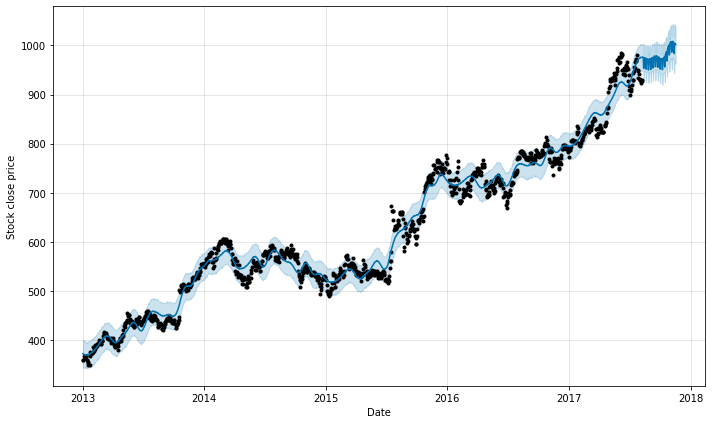

In [ ]:
model.plot(predictions, xlabel = "Date", ylabel= "Stock close price");

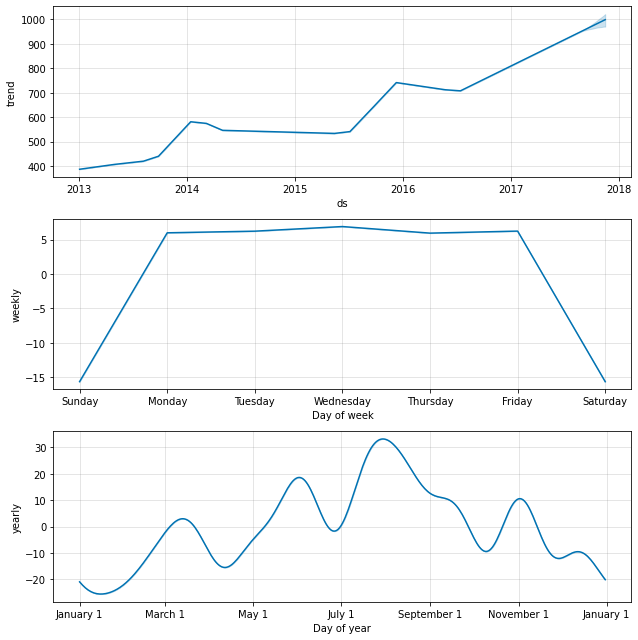

In [ ]:
model.plot_components(predictions);

In [ ]:
preds.shape

(1259, 2)

In [ ]:
y_pred = preds.iloc[-100:, 1]
y_test = test.y

In [ ]:
y_pred

1159     976.612423
1160     975.564497
1161     975.723284
1162     953.721062
1163     953.514837
           ...     
1254     983.563052
1255    1004.381091
1256    1003.835059
1257    1003.725988
1258    1002.018702
Name: yhat, Length: 100, dtype: float64

In [ ]:
y_test

1159     922.900024
1160     907.239990
1161     914.390015
1162     922.669983
1163     922.219971
           ...     
1254    1060.119995
1255    1056.739990
1256    1049.369995
1257    1048.140015
1258    1046.400024
Name: y, Length: 100, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_t, y_p):
  return float(np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_pred)))

In [ ]:
rmse(y_test, y_pred)

44.31477243427674

In [ ]:
sample.shape

(1259, 2)

In [ ]:
# Optimization Problem

In [67]:

import optuna
from fbprophet.diagnostics import cross_validation, performance_metrics

In [65]:
pip install optuna-dashboard

     |████████████████████████████████| 1.2 MB 32.3 MB/s 
     |████████████████████████████████| 308 kB 68.5 MB/s 
     |████████████████████████████████| 89 kB 9.2 MB/s 
     |████████████████████████████████| 209 kB 74.4 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 6.5 MB/s 
     |████████████████████████████████| 111 kB 50.1 MB/s 
     |████████████████████████████████| 144 kB 60.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=412c596c4112b8aa04adadc84c62731074b1609c757c6b4b8c6add99fdc7ce17
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# New Section

# New Section

In [68]:
m = Prophet()
m.fit(sample) 

number_initial_days = 366

sample_cv = cross_validation(m,
                         initial=f'{number_initial_days} days', 
                         period='180 days', 
                         horizon = '100 days',
                         parallel='processes')

sample_p = performance_metrics(sample_cv)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2014-04-09 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8f852a50>


In [69]:
param_types = {'changepoint_prior_scale': 'float', 
               'seasonality_prior_scale': 'float',
              'seasonality_mode': 'int'}

bounds = {'changepoint_prior_scale': [0.001, 0.5],
          'seasonality_prior_scale': [0.01, 10],
          'seasonality_mode': [0, 1]}  #0 for additive, 1 for multiplicative

In [70]:
def objective(trial):
    '''Train a prophet model and return the rmse'''
    # sampling
    params = {}
    for param in ['changepoint_prior_scale', 'seasonality_prior_scale']:
        params[param] = trial.suggest_uniform(param, bounds[param][0], bounds[param][1])
        
    stationality = ['additive', 'multiplicative']
    params['seasonality_mode'] = stationality[trial.suggest_int('seasonality_mode', 
                                                                  bounds['seasonality_mode'][0], 
                                                                  bounds['seasonality_mode'][1])]

    # modeling
    m = Prophet(weekly_seasonality=True,
                daily_seasonality=False,
                **params)
    
    m.fit(sample) 
    number_initial_days = 500
    df_cv = cross_validation(m, 
                             initial=f'{number_initial_days} days', 
                             period='180 days', 
                         horizon = '100 days',
                         parallel='processes')
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    print(df_p['mape'].mean())
    
    return df_p['rmse'].values[0]

In [71]:
study = optuna.create_study()
study.optimize(objective, n_trials = 10)

[I 2021-10-21 16:14:35,793] A new study created in memory with name: no-name-e38f7f51-f46b-42f0-8c63-fc3b2d3172c5
INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee90225290>
[I 2021-10-21 16:15:17,756] Trial 0 finished with value: 131.42657673084304 and parameters: {'changepoint_prior_scale': 0.2948775759274008, 'seasonality_prior_scale': 5.485490663997514, 'seasonality_mode': 1}. Best is trial 0 with value: 131.42657673084304.


0.1485738948158962


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee7da15a90>
[I 2021-10-21 16:15:43,336] Trial 1 finished with value: 91.1748947796976 and parameters: {'changepoint_prior_scale': 0.293730622415868, 'seasonality_prior_scale': 3.4141738563437434, 'seasonality_mode': 0}. Best is trial 1 with value: 91.1748947796976.


0.10138263446477136


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8fe429d0>
[I 2021-10-21 16:16:23,205] Trial 2 finished with value: 128.99974954713971 and parameters: {'changepoint_prior_scale': 0.26358509110292616, 'seasonality_prior_scale': 9.529451647231097, 'seasonality_mode': 1}. Best is trial 1 with value: 91.1748947796976.


0.1413956095411055


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee9031b550>
[I 2021-10-21 16:16:50,061] Trial 3 finished with value: 91.07695621557866 and parameters: {'changepoint_prior_scale': 0.2994521800508778, 'seasonality_prior_scale': 6.129343084739724, 'seasonality_mode': 0}. Best is trial 3 with value: 91.07695621557866.


0.10101361089105369


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8f7d9810>
[I 2021-10-21 16:17:17,959] Trial 4 finished with value: 90.67803903255377 and parameters: {'changepoint_prior_scale': 0.2953464064501442, 'seasonality_prior_scale': 7.113912977327488, 'seasonality_mode': 0}. Best is trial 4 with value: 90.67803903255377.


0.10124100405079897


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee90330a10>
[I 2021-10-21 16:17:31,174] Trial 5 finished with value: 91.94536718668125 and parameters: {'changepoint_prior_scale': 0.005165458884625428, 'seasonality_prior_scale': 7.520970298154929, 'seasonality_mode': 0}. Best is trial 4 with value: 90.67803903255377.


0.10756962944604488


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8f7c4990>
[I 2021-10-21 16:17:57,134] Trial 6 finished with value: 88.05331960607852 and parameters: {'changepoint_prior_scale': 0.35399251282958566, 'seasonality_prior_scale': 1.960548283055285, 'seasonality_mode': 0}. Best is trial 6 with value: 88.05331960607852.


0.0988835520330024


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8f7d9810>
[I 2021-10-21 16:18:38,968] Trial 7 finished with value: 109.508748570285 and parameters: {'changepoint_prior_scale': 0.08637432454124808, 'seasonality_prior_scale': 6.436212838552003, 'seasonality_mode': 1}. Best is trial 6 with value: 88.05331960607852.


0.12308889754821821


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee818f4710>
[I 2021-10-21 16:19:21,872] Trial 8 finished with value: 119.49156580779886 and parameters: {'changepoint_prior_scale': 0.1624990187953865, 'seasonality_prior_scale': 3.4443591753486955, 'seasonality_mode': 1}. Best is trial 6 with value: 88.05331960607852.


0.1253930270755403


INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-06 00:00:00 and 2017-09-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fee8f7c4c10>
[I 2021-10-21 16:20:00,768] Trial 9 finished with value: 131.0936007523422 and parameters: {'changepoint_prior_scale': 0.4799660949859818, 'seasonality_prior_scale': 8.061486366724646, 'seasonality_mode': 1}. Best is trial 6 with value: 88.05331960607852.


0.1469271380582386


In [72]:
study.best_params

{'changepoint_prior_scale': 0.35399251282958566,
 'seasonality_mode': 0,
 'seasonality_prior_scale': 1.960548283055285}

In [73]:
# Novbeti 100 gun proqnoz

In [74]:
train

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1154,2017-08-02,930.390015
1155,2017-08-03,923.650024
1156,2017-08-04,927.960022
1157,2017-08-07,929.359985


In [75]:
test

,ds,y
1159,2017-08-09,922.900024
1160,2017-08-10,907.239990
1161,2017-08-11,914.390015
1162,2017-08-14,922.669983
1163,2017-08-15,922.219971
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [76]:
params = study.best_params

In [77]:
params["seasonality_mode"] = "additive"

In [78]:
model = Prophet(weekly_seasonality=True,
                daily_seasonality=False,
                **params)

model.fit(train)
forecast = model.make_future_dataframe(periods = 100, freq= "D")
predictions = model.predict(forecast)
preds = predictions[["ds", "yhat"]]
y_pred = preds.iloc[-100:, 1]
y_test = test.y

In [79]:
rmse(y_test, y_pred)

105.58111045244203

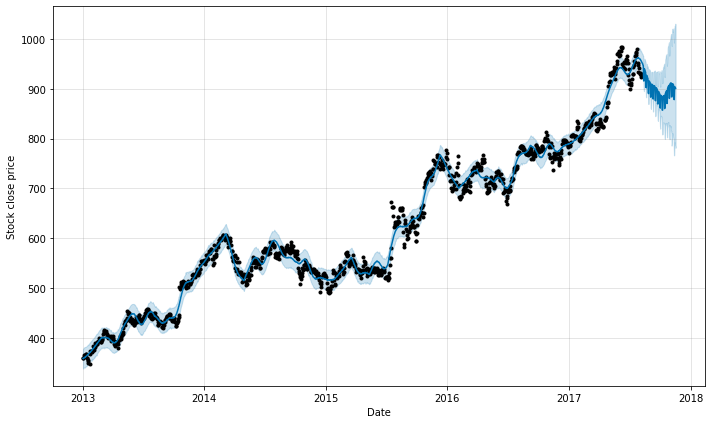

In [80]:
model.plot(predictions, xlabel = "Date", ylabel= "Stock close price");

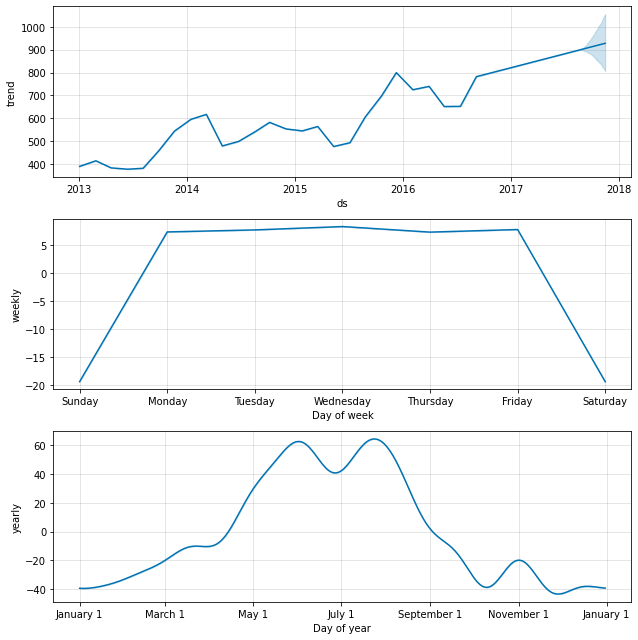

In [81]:
model.plot_components(predictions);
